In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
def draw_field(linenumbers=True,
               endzones=True,
               highlight_line=False,
               highlight_line_number=50,
               highlight_line_name='Line of Scrimmage',
               fifty_is_los=False,
               size=(12, 6.33)):
    # Draw the field
    x_path = [10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120]
    y_path = [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 53.3, 0, 0, 53.3]
    line_colour = 'white'

    field = patches.Rectangle(
        (0, 0),
        120,
        53.3,
        linewidth=0.1,
        edgecolor='r',
        facecolor='darkgreen',
        zorder=0
    )
    fig, ax = plt.subplots(1, figsize=size)
    ax.add_patch(field)
    plt.plot(x_path, y_path, line_colour)

    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')

    # Draw the LOS
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], colour='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')

    # Draw the endzones
    if endzones:
        left_ez = patches.Rectangle((0, 0), 10, 53.3,
                                    linewidth=0.1,
                                    edgecolor='r',
                                    facecolor='blue',
                                    alpha=0.2,
                                    zorder=0)
        right_ez = patches.Rectangle((110, 0), 120, 53.3,
                                    linewidth=0.1,
                                    edgecolor='r',
                                    facecolor='blue',
                                    alpha=0.2,
                                    zorder=0)
        ax.add_patch(left_ez)
        ax.add_patch(right_ez)

    # Draw the line markings
    if linenumbers:
        for x in range(20, 110, 10):
            yardage = x
            if x > 50:
                yardage = 120 - x
            plt.text(x, 5, str(yardage - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(yardage - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white',
                     rotation=180)

    # Draw the hash marks
    hash_range = range(11, 110) if endzones else range(1, 120)
    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    # Draw the highlighted line
    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<-{}'.format(highlight_line_name), color='yellow')

    return fig, ax

(<Figure size 864x455.76 with 1 Axes>, <AxesSubplot:>)

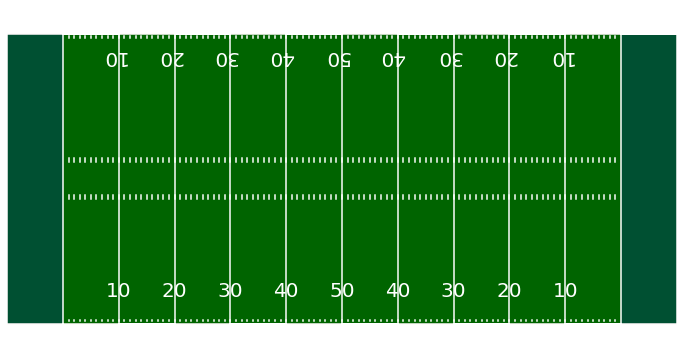

In [5]:
draw_field()

In [ ]:
# draw snap shot of play
def draw_play_state(play_data, frame):

    def draw_team_state(team):
        team_data = play_data.loc[(play_data['teamType'] == team)]

        # draw positions
        team_data.plot(x=pos[0], y=pos[1], kind='scatter', ax=ax, color='orange', s=30, legend=team, label=team)
        # draw orientations
        # draw offense direction vectors
        # draw offense convex hull
        pass

    # draw field as background
    los = play_data.loc[(play_data['team'] == 'football') & (play_data['frameId'] == 1)]['absoluteYardlineNumber'].values[0]
    fig, ax = draw_field(highlight_line=True, highlight_line_number=los)

    # draw the teams
    draw_team_state('offense')
    draw_team_state('defense')

    # label the plot
    plt.suptitle('Game # something at event')
    plt.title('Play description')
    plt.legend(loc=1)
    plt.show()

In [13]:
x = np.array([np.array([0, 7]), np.array([1, 8]), np.array([2, 9])]
             )
x

array([[0, 7],
       [1, 8],
       [2, 9]])

In [15]:
x[:, 0]

array([0, 1, 2])